# K- Nearest Neighbour

### A Simply vector implimentation using numpy random array

In [1]:
# numpy for numerical calculations and matplotlib for ploting 

import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for visually enhancing the matplotlib plots


In [2]:
# 'X' is random array of point. we will find the 'k' nearest Neighbours for all the points in 'X'.

x = np.random.randint(0,100,[6,2])
x.shape

(6, 2)

In [3]:
x

array([[80, 66],
       [ 5, 52],
       [34, 98],
       [54, 26],
       [81, 56],
       [86, 83]])

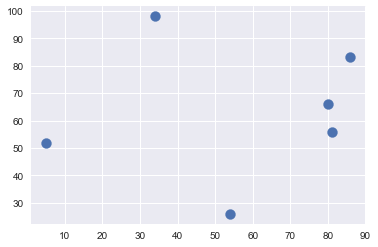

In [4]:
#ploting col 1 vs col 2

plt.scatter(x[:,0],x[:,1], s = 100)

In [5]:
#calulating the difference for each point from all the points

difference = x[:,np.newaxis,:] - x[np.newaxis,:,:]
difference

array([[[  0,   0],
        [ 75,  14],
        [ 46, -32],
        [ 26,  40],
        [ -1,  10],
        [ -6, -17]],

       [[-75, -14],
        [  0,   0],
        [-29, -46],
        [-49,  26],
        [-76,  -4],
        [-81, -31]],

       [[-46,  32],
        [ 29,  46],
        [  0,   0],
        [-20,  72],
        [-47,  42],
        [-52,  15]],

       [[-26, -40],
        [ 49, -26],
        [ 20, -72],
        [  0,   0],
        [-27, -30],
        [-32, -57]],

       [[  1, -10],
        [ 76,   4],
        [ 47, -42],
        [ 27,  30],
        [  0,   0],
        [ -5, -27]],

       [[  6,  17],
        [ 81,  31],
        [ 52, -15],
        [ 32,  57],
        [  5,  27],
        [  0,   0]]])

In [6]:
# squaring the difference to elimiate the -ve vlaues(vector to scalar)

sqr_difference= difference ** 2
sqr_difference

array([[[   0,    0],
        [5625,  196],
        [2116, 1024],
        [ 676, 1600],
        [   1,  100],
        [  36,  289]],

       [[5625,  196],
        [   0,    0],
        [ 841, 2116],
        [2401,  676],
        [5776,   16],
        [6561,  961]],

       [[2116, 1024],
        [ 841, 2116],
        [   0,    0],
        [ 400, 5184],
        [2209, 1764],
        [2704,  225]],

       [[ 676, 1600],
        [2401,  676],
        [ 400, 5184],
        [   0,    0],
        [ 729,  900],
        [1024, 3249]],

       [[   1,  100],
        [5776,   16],
        [2209, 1764],
        [ 729,  900],
        [   0,    0],
        [  25,  729]],

       [[  36,  289],
        [6561,  961],
        [2704,  225],
        [1024, 3249],
        [  25,  729],
        [   0,    0]]], dtype=int32)

In [7]:
sqr_difference.shape

(6, 6, 2)

In [8]:
# calculating the squared distance between all the points
# Note that the axis '-1' instructs to calculate sum of elements in the 1st dimention

dist = np.sum(sqr_difference, axis=-1)
dist


array([[   0, 5821, 3140, 2276,  101,  325],
       [5821,    0, 2957, 3077, 5792, 7522],
       [3140, 2957,    0, 5584, 3973, 2929],
       [2276, 3077, 5584,    0, 1629, 4273],
       [ 101, 5792, 3973, 1629,    0,  754],
       [ 325, 7522, 2929, 4273,  754,    0]], dtype=int32)

In [9]:
# shape of the squared distance. 
dist.shape



(6, 6)

In [10]:
# argsort is performed along reach row of the dist array to sort by indices.
# this operation sorts the whole array and hence this isn't the most efficent way of finding the k values.

nearest = np.argsort(dist, axis=1)
nearest

array([[0, 4, 5, 3, 2, 1],
       [1, 2, 3, 4, 0, 5],
       [2, 5, 1, 0, 4, 3],
       [3, 4, 0, 1, 5, 2],
       [4, 0, 5, 3, 2, 1],
       [5, 0, 4, 2, 3, 1]], dtype=int32)

In [11]:
#the number of calculation can be minimized by using argpartition funcition on the dist array to find only the 'K' nearest values
# let says we want to find the 2 nearest values to each point(k=2)
k = 2
k_nearest = np.argpartition(dist, k+1, axis=1)

k_nearest

array([[4, 0, 5, 3, 2, 1],
       [1, 2, 3, 4, 0, 5],
       [2, 5, 1, 0, 4, 3],
       [3, 4, 0, 1, 5, 2],
       [4, 0, 5, 3, 2, 1],
       [5, 0, 4, 2, 3, 1]], dtype=int32)

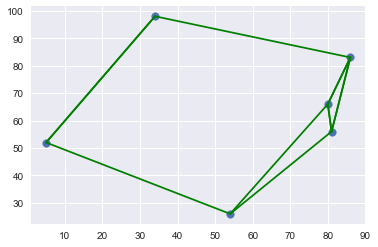

In [12]:
# ploting the lines indicating the k nearest points to a given point

plt.scatter(x[:,0],x[:,1], s = 60)  # plots the points of 'X' (col 1 vs col2)
for i in range(x.shape[0]):          # iterating over each point in 'x'
    for j in k_nearest[i, :k+1]:     # index till K+1 points from the partitioned array (k_nearest) 
        plt.plot(*zip(x[j], x[i]), color='green') 
        
        
        